## 模型训练及预训练模型应用指南 (A Guide to Model Training and Application of Pre-trained Models)
1、我们提供了复现PlantDeepSEA结果所需的数据和使用这些数据训练的DeeperDeepSEA模型(即我们在网络服务中所应用的模型)。

We provide the data needed to reproduce the PlantDeepSEA results and the DeeperDeepSEA model trained using these data (i.e., the model we apply in the web service).


2、本指南供感兴趣的研究者参考，用于复现模型训练结果或在本地使用预训练模型进行预测。

This guide is for interested researchers to reproduce model training results or to make predictions locally using pre-trained models.

3、本指南事实上是selene-sdk在我们的数据和预训练模型上的应用指南。

This guide is in fact a guide to the application of selene-sdk on our data and pre-trained models.

4、再次感谢selene-sdk的开发者提供了该工具。

Thanks again to the developers of selene-sdk for making the tool available.

In [ ]:
# 无论是复现模型结果还是使用预训练模型，您都需要首先安装selene-sdk（https://github.com/FunctionLab/selene）及对应版本的pytorch。
# Whether you are reproducing model results or using a pre-trained model, you will first need to install selene-sdk (https://github.com/FunctionLab/selene) and the corresponding version of pytorch.

# 此处，我们假设您已经完成 PyTorch 的安装 
# Here, we assume that you have already installed PyTorch.

# 安装selene-sdk
# Install selene-sdk
! pip install selene-sdk

     |████████████████████████████████| 1.3 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 45 kB 2.8 MB/s 
     |████████████████████████████████| 753.4 MB 6.5 kB/s 
     |████████████████████████████████| 636 kB 50.3 MB/s 
  Created wheel for selene-sdk: filename=selene_sdk-0.5.0-cp37-cp37m-linux_x86_64.whl size=1525578 sha256=7f475603250c002bc099e5d99fafc2d8efd66d03bd7e11df83731cafe29517b8
  Stored in directory: /root/.cache/pip/wheels/09/ef/33/2b6a1e5a33d3d54f70e044e461c58c12f294b6692fe29c5229
  Created wheel for pyfaidx: filename=pyfaidx-0.6.2-py3-none-any.whl size=26300 sha256=5e841d3fcb900bf401645fd4d579673b9b6c822ce7091b6f934b8668694f77f3
  Stored in directory: /root/.cache/pip/wheels/d9/7c/4a/8ce3d8136233bd45bd6222c86c109e302dc0bb6915ed92fe5d
  Created wheel for pytabix: filename=pytabix-0.1-cp37-cp37m-linux_x86_64.whl size=111067 sha256=6fe9629e67

### 我们以水稻Zhenshan97为例，展示模型训练和预训练模型应用方法
### We use rice Zhenshan97 as an example to demonstrate the model training and pre-training model application methods.

#### 训练模型（Training Model）

In [ ]:
# 数据下载
# Data Download

# 下载除参考基因组外的数据文件
# Download data files other than the reference genome
! wget http://plantdeepsea.ncpgr.cn/model_and_data/training_data/zs.zip
! unzip zs.zip
! ls zs

# 下载对应参考基因组文件
# Download the corresponding reference genome file

--2021-09-13 12:24:43--  http://plantdeepsea.ncpgr.cn/model_and_data/training_data/zs.zip
Resolving plantdeepsea.ncpgr.cn (plantdeepsea.ncpgr.cn)... 211.69.140.157
Connecting to plantdeepsea.ncpgr.cn (plantdeepsea.ncpgr.cn)|211.69.140.157|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14103820 (13M) [application/zip]
Saving to: ‘zs.zip’

zs.zip              100%[===================>]  13.45M  4.61MB/s    in 2.9s    

2021-09-13 12:24:47 (4.61 MB/s) - ‘zs.zip’ saved [14103820/14103820]

Archive:  zs.zip
   creating: zs/
  inflating: zs/sorted_zs97_15tissues.bed.gz  
  inflating: zs/sorted_zs97_15tissues.bed.gz.tbi  
  inflating: zs/sorted_zs97_15tissues.bed  
  inflating: zs/distinct_features.txt  
  inflating: zs/g_interval_bed.py    
  inflating: zs/ZS97_genome_interval.bed  
  inflating: zs/ZS97.genome          
distinct_features.txt	      sorted_zs97_15tissues.bed.gz.tbi
g_interval_bed.py	      ZS97.genome
sorted_zs97_15tissues.bed     ZS97_genome_interval.

In [ ]:
# 下载模型结构文件、模型配置文件
# Download model structure files, model configuration files
! wget http://plantdeepsea.ncpgr.cn/model_and_data/training_config_files/zs_train.yml
! wget http://plantdeepsea.ncpgr.cn/model_and_data/deeperdeepsea.py

--2021-09-13 12:25:12--  http://plantdeepsea.ncpgr.cn/model_and_data/training_config_files/zs_train.yml
Resolving plantdeepsea.ncpgr.cn (plantdeepsea.ncpgr.cn)... 211.69.140.157
Connecting to plantdeepsea.ncpgr.cn (plantdeepsea.ncpgr.cn)|211.69.140.157|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1792 (1.8K) [text/plain]
Saving to: ‘zs_train.yml’

zs_train.yml        100%[===================>]   1.75K  --.-KB/s    in 0s      

2021-09-13 12:25:14 (177 MB/s) - ‘zs_train.yml’ saved [1792/1792]

--2021-09-13 12:25:14--  http://plantdeepsea.ncpgr.cn/model_and_data/deeperdeepsea.py
Resolving plantdeepsea.ncpgr.cn (plantdeepsea.ncpgr.cn)... 211.69.140.157
Connecting to plantdeepsea.ncpgr.cn (plantdeepsea.ncpgr.cn)|211.69.140.157|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3527 (3.4K) [text/plain]
Saving to: ‘deeperdeepsea.py’

deeperdeepsea.py    100%[===================>]   3.44K  16.6KB/s    in 0.2s    

2021-09-13 12:25:18 (16.6 KB/

In [ ]:
# 查看配置文件
# View model configuration files
! cat ./zs_train.yml

# 您需要修改配置文件中的数据文件路径，以保证与您的实际文件存储路径相匹配
# You will need to modify the data file path in the configuration file to ensure that it matches your actual file storage path.

---
ops: [train, evaluate]
model: {
    # TODO: update this line with the absolute path to the file.
    path: <ABSOLUTE_PATH>/deeperdeepsea.py,
    class: DeeperDeepSEA,
    class_args: {
        sequence_length: 1000,
        n_targets: 15,
    },
    non_strand_specific: mean
}
sampler: !obj:selene_sdk.samplers.IntervalsSampler {
    reference_sequence: !obj:selene_sdk.sequences.Genome {
        # we include relative paths here, but we recommend using absolute
        # paths for future configuration files
        input_path: ./genome/ZS97.fasta
    },
    features: !obj:selene_sdk.utils.load_features_list {
        input_path: ./data/zs/distinct_features.txt
    },
    target_path: ./data/zs/sorted_zs97_15tissues.bed.gz,
    intervals_path: ./data/zs/ZS97_genome_interval.bed,
    seed: 127,
    # A positive example is an 1000bp sequence with at least 1 class/feature annotated to it.
    # A negative sample has no classes/features annotated to the sequence.
    sample_negative: True

In [ ]:
from selene_sdk.utils import load_path
from selene_sdk.utils import parse_configs_and_run

# 加载配置文件
# Loading configuration files
configs = load_path("./zs_train.yml")

# 开始训练（学习率设为0.01），结果将保存在yml文件中指定的输出路径
# Start training (learning rate is set to 0.01), the results will be saved in the output path specified in the yml file
# 该步骤需要较长时间，故不作运行展示。
# This step takes a long time, so it is not shown running.
parse_configs_and_run(configs,lr=0.01)

#### 使用预训练模型

In [ ]:
# 下载预训练模型文件
# Download pre-trained model files
! wget http://plantdeepsea.ncpgr.cn/model_and_data/models/zs_model.zip
! unzip zs_model.zip
! ls zs_model

--2021-09-13 12:27:04--  http://plantdeepsea.ncpgr.cn/model_and_data/models/zs_model.zip
Resolving plantdeepsea.ncpgr.cn (plantdeepsea.ncpgr.cn)... 211.69.140.157
Connecting to plantdeepsea.ncpgr.cn (plantdeepsea.ncpgr.cn)|211.69.140.157|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169812055 (162M) [application/zip]
Saving to: ‘zs_model.zip’

zs_model.zip        100%[===================>] 161.95M  7.05MB/s    in 25s     

2021-09-13 12:27:30 (6.41 MB/s) - ‘zs_model.zip’ saved [169812055/169812055]

Archive:  zs_model.zip
   creating: zs_model/
  inflating: zs_model/selene_sdk.train_model.log  
  inflating: zs_model/validate_data.bed  
  inflating: zs_model/selene_sdk.train_model.train.txt  
  inflating: zs_model/selene_sdk.train_model.validation.txt  
  inflating: zs_model/best_model.pth.tar  
  inflating: zs_model/test_data.bed  
  inflating: zs_model/test_targets.npz  
  inflating: zs_model/test_predictions.npz  
  inflating: zs_model/test_performance.txt 

In [ ]:

import os
# 可视化模块
# Visualization Module
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

# 所有用于变异效应预测和计算机模拟诱变的模块
# All the necessary methods to do variant effect prediction and in silico mutagenesis.
from selene_sdk.predict import AnalyzeSequences
from selene_sdk.sequences import Genome
from selene_sdk.utils import load_features_list
from selene_sdk.utils import NonStrandSpecific
from selene_sdk.utils import DeeperDeepSEA

In [ ]:
# 样本描述文件，记录了模型训练时所用的样本名
# Sample description file, which records the sample names used in the model training
distinct_features = load_features_list("./zs/distinct_features.txt")

model_predict = AnalyzeSequences(
    NonStrandSpecific(DeeperDeepSEA(1000, 15)), # 1k为输入序列长度，15对应训练模型时使用的样本数，即distinct_features中的行数
    "/content/zs_model/best_model.pth.tar",     # 1k is the length of the input sequence and 15 corresponds to the number of samples used in training the model, i.e., the number of rows in the distinct_features.   
    sequence_length=1000,
    features=distinct_features,
    reference_sequence=Genome("/content/drive/MyDrive/ZS97.fasta"),
    use_cuda=True  # 使用CUDA加速，建议条件允许情况下选为True # Use CUDA acceleration, it is recommended to select True if conditions allow
)

# 变异注释
# do variant effect prediction
model_predict.variant_effect_prediction(
    "/content/drive/MyDrive/example.vcf",
    save_data= ['abs_diffs','diffs', 'logits', 'predictions'],
    output_dir="./variants_output")

# !ls ./variants_output

In [ ]:
! head ./variants_output/example_abs_diffs.tsv

chrom	pos	name	ref	alt	strand	ref_match	contains_unk	ZS97_flag_leaf_1	ZS97_flag_leaf_2	ZS97_flower_1	ZS97_flower_2	ZS97_lemma_1	ZS97_lemma_2	ZS97_panicle_1	ZS97_panicle_2	ZS97_panicle_3	ZS97_panicle_4	ZS97_panicle_5	ZS97_root_1	ZS97_root_2	ZS97_young_leaf_1	ZS97_young_leaf_2
chr09	17599229	vg0916410299	G	C	+	True	False	1.37e-02	1.59e-02	1.58e-02	1.38e-02	6.18e-03	6.78e-03	1.09e-02	1.48e-03	3.77e-03	6.82e-03	8.24e-03	3.19e-03	1.94e-03	6.00e-03	1.06e-03


In [ ]:
# 查看示例fasta序列
# View an example fasta sequence
! head /content/drive/MyDrive/example.fasta

>example
ACACAGCTAAAATGAATCGCATATGCAGTGAATGAGACTCTGAGAGCCCAGTTTAAGGTAGGAGTAGCATCAAATTCACTAGTCCTATACACCGGCACGT
CGTCGCAGTGCAATTTTATACGATCTTCATGTGTGCATCAGTGCATGCTGTTTGCAGAAGGGAAGTTGGCCGCCTGCCCGTGCTGAGCTCAACTGAACGC
TGGCTGCCTGCATGGCCAGTTCGTGACTACAGTTACTACGCATACTACCCGGGGTAGCAGCGGCGCGCTATCAGCTCTACCCGGAGTAGGCAGTAGCAGC
AGTGGTGGTAGTAGTAGAAAGCGCGGCAGTGGAAGGGATAGAGGAGTGCCCACATTAATAACTCGTTTCAAATCGGACGGCGTGGCTACTCTAGTACACC
CATTTCAACGGGCCGTTCCACTCCACTCCACCGTAACTGCGCGCGTGGGGCGACCCCATCACGTGCCACGGTACGGGGGCGTCGCTGACCGTCTCTGGCC
CACCGCAACCCTGCTCCCCCAATCCAAACCCCGCGCTGCACGTCTCGCTGGCACTGGCCATTTCGATCCATCGCGGTCGCGGCCGCGGTATCACGACTGA
CGCGCGGGGCCGGCCCGGCACGCGAGACCGATGTAGACGTGTCACCGGGGAAGCTTGTCCGCTCGCGGTTGCCGCTGCGCGGGGGGGAGGGGAGGGCGTC
GAGCCGTACGTCGTCGTCGCATACCTCGGTCGCGTCCCTGTCAAAGCCGGCCATCGCTGCCGGCTGCTCAATTTATTCCCTTGCTGTTTCATTTCGTACG
TAGTCCGCGCTCGGGATGCGGCCATAGCCATATCGCCATATATCTCGGGCAGGCACCGTCACGCTCGCTCGGCAACTGTACGTGCCGTCTCAGGACGCGG


In [ ]:
# 计算机模拟诱变
# in silico mutagenesis
model_predict.in_silico_mutagenesis_from_file(
    "/content/drive/MyDrive/example.fasta",
    save_data=["abs_diffs", "diffs", "logits", "predictions"],
    output_dir="./mutations_output")

# !ls ./mutations_output

In [ ]:
!head ./mutations_output/example_logits.tsv

pos	ref	alt	ZS97_flag_leaf_1	ZS97_flag_leaf_2	ZS97_flower_1	ZS97_flower_2	ZS97_lemma_1	ZS97_lemma_2	ZS97_panicle_1	ZS97_panicle_2	ZS97_panicle_3	ZS97_panicle_4	ZS97_panicle_5	ZS97_root_1	ZS97_root_2	ZS97_young_leaf_1	ZS97_young_leaf_2
0	A	C	-3.76e-06	-3.34e-06	-1.79e-06	-7.15e-07	0.00e+00	0.00e+00	0.00e+00	0.00e+00	-7.15e-07	0.00e+00	0.00e+00	-8.94e-07	-7.75e-07	-2.38e-06	-2.41e-06
0	A	G	1.11e-05	7.69e-06	3.70e-06	4.05e-06	3.81e-06	3.58e-06	5.96e-06	3.81e-06	3.58e-06	7.39e-06	7.87e-06	2.92e-06	4.05e-06	6.08e-06	7.36e-06
0	A	T	-7.45e-07	-7.75e-07	-8.34e-07	-7.15e-07	0.00e+00	0.00e+00	0.00e+00	-1.07e-06	-7.15e-07	0.00e+00	0.00e+00	-3.58e-07	-2.98e-07	-8.34e-07	-1.88e-06
1	C	A	1.43e-05	9.95e-06	4.53e-06	4.77e-06	4.77e-06	4.53e-06	5.96e-06	4.89e-06	4.53e-06	9.30e-06	9.78e-06	4.11e-06	5.13e-06	7.69e-06	8.52e-06
1	C	G	-6.20e-06	-6.91e-06	-1.79e-06	-7.15e-07	0.00e+00	1.19e-06	3.10e-06	2.26e-06	1.43e-06	3.81e-06	3.81e-06	-2.74e-06	-3.10e-06	-5.54e-06	-4.83e-06
1	C	T	-6.20e-06	-6.44e-06	-8.34e-

In [ ]:
# 绘图函数复制自 https://github.com/FunctionLab/selene/blob/master/tutorials/variants_and_visualizations/variants_and_visualizations.ipynb  除颜色外未做更改
# Drawing functions copied from https://github.com/FunctionLab/selene/blob/master/tutorials/variants_and_visualizations/variants_and_visualizations.ipynb except No change except for color
import matplotlib.pyplot as plt
import numpy as np

from selene_sdk.interpret import heatmap
from selene_sdk.interpret import ISMResult
%matplotlib inline

def _get_features_containing_str(feature_substring):
    features = []
    for feature in distinct_features:
        if feature_substring in feature:
            features.append(feature)
    return features

def _get_scores(ism_result, visualize_features, start, end):
    matrices = []
    for f in visualize_features:
        score_matrix = ism_result.get_score_matrix_for(f)
        matrices.append(score_matrix[start:end,])
    return matrices

def visualize(ism_result, target, start=0, end=200):
    """
    Parameters
    ----------
    ism_result : selene.interpret.ISMResult
        Output of `ISMResult.from_file` from an output file.
    target : str
        Pass in a feature name. If you want to visualize multiple features
        that share the same substring, pass in that substring.
    start : int
        Starting position for the heatmap visualization.
    end : int
        Ending position for the heatmap visualization.
    
    """
    target_features = _get_features_containing_str(target)
    matrices = _get_scores(ism_result, target_features, start, end)
    reference_encoding = Genome.sequence_to_encoding(
        ism_result.reference_sequence)[start:end,] == 1.
    for ix, m in enumerate(matrices):
        figure, (ax) = plt.subplots(1, 1, figsize=(24, 4))
        ax.patch.set(edgecolor="gray", hatch="//")
        ax.set_title("Feature {0}".format(target_features[ix]))
        
        # Set the min and max for the colorbar so that it is centered at 0.
        colorbar_bound = max(np.max(m), np.abs(np.min(m)))
        
        heatmap(m, mask=reference_encoding,
                cbar=True,
                cmap="RdBu_r",
                vmin=-1 * colorbar_bound,
                vmax=colorbar_bound,
                ax=ax,
                linewidth=0.5,
                xticklabels=list(range(start, end)))

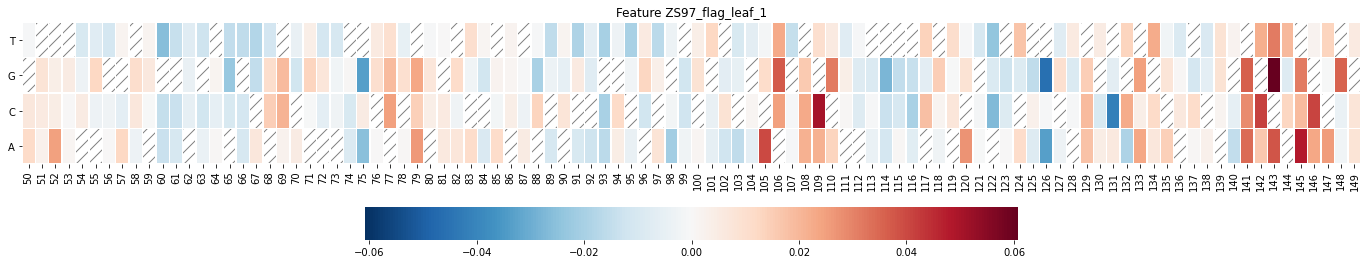

In [ ]:
example_mutation = ISMResult.from_file("./mutations_output/example_logits.tsv")
# 绘图展示
# Drawing display
visualize(example_mutation, "ZS97_flag_leaf_1",50,150)

 web服务中的bed文件输入及位置输入功能，事实上是序列输入方法的扩展，故此处不作展示。
 
 The bed file input and location input functions in the web service are in fact extensions of the sequence input method, so they are not shown here.


 本tutorial中涉及的selene函数的具体解释和更多可以使用预训练模型进行的工作，请参见selene文档 https://selene.flatironinstitute.org/master/index.html

 For a specific explanation of the selene functions covered in this tutorial and more work that can be done with pre-trained models, please see the selene documentation.